In [202]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data

In [203]:
df = pd.read_excel('startup-expansion.xlsx')
df.tail()

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue
145,146,Paterson,New Jersey,Region 1,New,2251,34603
146,147,Brownsville,Texas,Region 2,New,3675,63148
147,148,Rockford,Illinois,Region 1,New,2648,43377
148,149,College Station,Texas,Region 2,New,2994,22457
149,150,Thousand Oaks,California,Region 2,NaN,2431,40141


In [204]:
# number of columns and rows
df.shape

(150, 7)

In [205]:
startup = df.copy()

In [206]:
startup.columns

Index(['Store ID', 'City', 'State', 'Sales Region', 'New Expansion',
       'Marketing Spend', 'Revenue'],
      dtype='object')

In [207]:
startup.dtypes

Store ID            int64
City               object
State              object
Sales Region       object
New Expansion      object
Marketing Spend     int64
Revenue             int64
dtype: object

In [208]:
startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Store ID         150 non-null    int64 
 1   City             150 non-null    object
 2   State            150 non-null    object
 3   Sales Region     150 non-null    object
 4   New Expansion    149 non-null    object
 5   Marketing Spend  150 non-null    int64 
 6   Revenue          150 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 8.3+ KB


In [209]:
startup[['Marketing Spend', 'Revenue']].describe()

,Marketing Spend,Revenue
count,150.000000,150.000000
mean,2893.146667,39301.433333
std,367.862817,15465.753977
min,1811.000000,15562.000000
25%,2662.250000,21113.500000
50%,2898.000000,42993.000000
75%,3111.500000,51145.500000
max,3984.000000,68828.000000


## Data Preprocessing

In [210]:
startup.isna().sum()

Store ID           0
City               0
State              0
Sales Region       0
New Expansion      1
Marketing Spend    0
Revenue            0
dtype: int64

In [211]:
startup.dropna(subset=['New Expansion'], inplace= True)

In [212]:
startup

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue
0,1,Peoria,Arizona,Region 2,Old,2601,48610
1,2,Midland,Texas,Region 2,Old,2727,45689
2,3,Spokane,Washington,Region 2,Old,2768,49554
3,4,Denton,Texas,Region 2,Old,2759,38284
4,5,Overland Park,Kansas,Region 2,Old,2869,59887
...,...,...,...,...,...,...,...
144,145,Glendale,California,Region 2,New,2363,49376
145,146,Paterson,New Jersey,Region 1,New,2251,34603
146,147,Brownsville,Texas,Region 2,New,3675,63148
147,148,Rockford,Illinois,Region 1,New,2648,43377


## EDA

<AxesSubplot:>

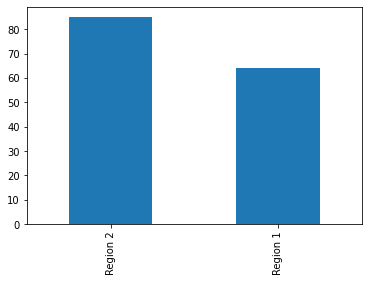

In [213]:
startup['Sales Region'].value_counts().plot(kind='bar')

<AxesSubplot:>

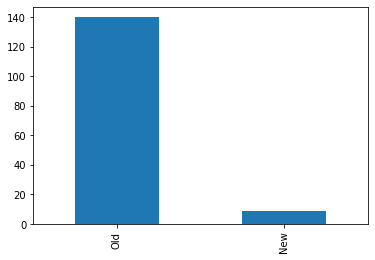

In [214]:
startup['New Expansion'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='State'>

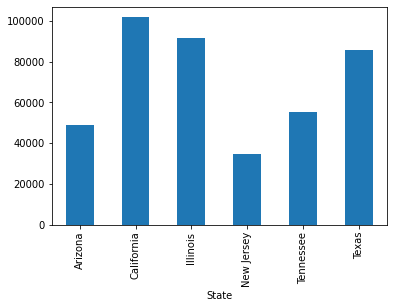

In [215]:
startup[startup['New Expansion']=='New'].groupby('State')['Revenue'].sum().plot(kind='bar')

<AxesSubplot:xlabel='State'>

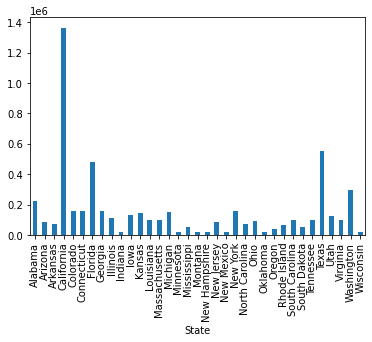

In [216]:
startup[startup['New Expansion']=='Old'].groupby('State')['Revenue'].sum().plot(kind='bar')

## Create some measures

In [217]:
# Add Profit column = Revenu - Amount spent
startup['Profit'] = round(startup['Revenue'] - startup['Marketing Spend'],2)

In [218]:
# Add New column ROI(return on investment) = (Net income / Amount spent) * 100
startup['ROI'] = round((startup['Profit'] / startup['Marketing Spend']) * 100,2)

In [219]:
startup['ROI %'] = startup['ROI'] / 100

In [220]:
startup

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue,Profit,ROI,ROI %
0,1,Peoria,Arizona,Region 2,Old,2601,48610,46009,1768.90,17.6890
1,2,Midland,Texas,Region 2,Old,2727,45689,42962,1575.43,15.7543
2,3,Spokane,Washington,Region 2,Old,2768,49554,46786,1690.25,16.9025
3,4,Denton,Texas,Region 2,Old,2759,38284,35525,1287.60,12.8760
4,5,Overland Park,Kansas,Region 2,Old,2869,59887,57018,1987.38,19.8738
...,...,...,...,...,...,...,...,...,...,...
144,145,Glendale,California,Region 2,New,2363,49376,47013,1989.55,19.8955
145,146,Paterson,New Jersey,Region 1,New,2251,34603,32352,1437.23,14.3723
146,147,Brownsville,Texas,Region 2,New,3675,63148,59473,1618.31,16.1831
147,148,Rockford,Illinois,Region 1,New,2648,43377,40729,1538.10,15.3810


In [224]:
startup.to_csv('startup-expansion-modified.csv')

## Go To PowerBI to Generate Dashboard